# Experiments

We evaluate our online classifier through two experiments to determine their performance and
their robustness to mislabeled data. In these experiments, we use five publicly available
datasets that contain sEMG data of hand gestures and three feature sets. We make publicly available the code (shown
in the supplementary material) of this empirical evaluation to easily compare our approach with future approaches in this field.

First: Import the library developed to visualize the results

In [1]:
import Experiments.analysis_experiments as analysis_experiments


## Experiment 1

To evaluate the performance of our approach, we define five DA classifiers (LDA/QDA): initial (baseline), online
classifier using labels and pseudo-labels through our soft-labeling, Nigam's soft-labeling,
and thresholding techniques.

The **initial classifier** is a DA classifier trained over a dataset $\mathcal{I}$ that has one gesture per class.
The **online classifier using labels and pseudo-labels** is a DA classifier initially trained over the set $\mathcal{I}$
and sequentially updated *with labeled gestures* and *with pseudo-labeled gestures* by our soft-labeling technique
, respectively.
The **Nigam-based classifier** is the online classifier updated with pseudo-labeled gestures using Nigam's soft-labeling.
In this technique, a gesture is pseudo-labeled using the conditional posterior probability $p_{(c,t)}$
multiplied by a parameter $\lambda$ that decreases the contribution of this probability to minimize the error of
gestures incorrectly pseudo-labeled. The parameter $\lambda$ is in the interval $[0,1]$.
The **thresholding-based classifier** is also the online classifier updated with pseudo-labeled gestures using the
thresholding technique that is commonly used in self-training learning. In this technique, a gesture is labeled based
on the probability $p_{(c,t)}$. If this probability is greater than a threshold $\tau$, then this pseudo-labeled gesture
is used to update the classifier.

In this experiment, we determine the best parameters $\lambda$ and $\tau$ for each dataset and feature set from the set
 $\{0,0.1,\cdots, 1\}$ using grid search optimization.

In [2]:
analysis_experiments.experiment1(best_parameters_Nigam_thresholding=True)



FEATURE 1: Nina5
Best parameter λ (for Nigam-based classifier) is 0.6. Accuracy Difference (wrt initial classifier)=1.9
Best parameter λ (for Nigam-based classifier) is 1.0. Accuracy Difference (wrt initial classifier)=12.74
Best parameter τ (for thresholding-based classifier) is 0.4. Accuracy Difference (wrt initial classifier)=2.72
Best parameter τ (for thresholding-based classifier) is 0.0. Accuracy Difference (wrt initial classifier)=8.29
FEATURE 2: Nina5
Best parameter λ (for Nigam-based classifier) is 1.0. Accuracy Difference (wrt initial classifier)=5.11
Best parameter λ (for Nigam-based classifier) is 1.0. Accuracy Difference (wrt initial classifier)=-4.06
Best parameter τ (for thresholding-based classifier) is 0.3. Accuracy Difference (wrt initial classifier)=6.05
Best parameter τ (for thresholding-based classifier) is 0.3. Accuracy Difference (wrt initial classifier)=-13.12
FEATURE 3: Nina5
Best parameter λ (for Nigam-based classifier) is 1.0. Accuracy Difference (wrt initia

For the five DA classifiers, the following figure shows the average classification accuracy of the users in the five
datasets using the three feature sets described above.
To determine if the accuracy differences between the methods tested are statistically significant, we use the 2-tailed
Wilcoxon signed ranks test at $p_{value}<0.5$.
As we excepted, the accuracy of the online classifier using labels is higher than the accuracy of the other classifiers
that use pseudo-labeled gestures. Note that this accuracy is equal to the accuracy of a DA classifier trained with all
data (the initial set $\mathcal{I}$ and all labeled gestures) in full batch fashion, as we established in Theorem 1.
The accuracies of the online classifier using labels and pseudo-labels are higher than the accuracy of the initial
classifier, so the updating proposed by us improves the performance of a DA classifier trained with few samples (one gesture per class).
In contrast, the Nigam-based and thresholding-based classifiers perform worse than the initial classifier when the
DA classifier is QDA as we can see, for example, in NinaPro5 and Long-Term 3DC using the feature sets FS2 and FS3, and
in Capgmyo\_dbb using the feature set FS2.



ANALYSIS WILCOXON (CONFIDENCE LEVEL 95%) shows the accuracy of two classifiers that come from the same distribution (Nina5): 

FEATURE 1: Nina5
p value 0.970219757029658 , LDA_oursusing pseudo-labels and LDA_ours_threshold_0.4 and comes from the same distribution

FEATURE 2: Nina5
p value 0.2958775226696384 , LDA_oursusing pseudo-labels and LDA_ours_threshold_0.3 and comes from the same distribution
p value 0.7651984444971875 , QDA_oursusing pseudo-labels and QDA_weak and comes from the same distribution
p value = 0.7651984444971875 , QDA_initial_classifier and QDA_ours_soft_labels come from the same distribution
p value = 0.7089053094753638 , QDA_initial_classifier and QDA_ours_probs_1.0 come from the same distribution
p value 0.11688763780953301 , QDA_oursusing pseudo-labels and QDA_ours_probs_1.0 and comes from the same distribution

FEATURE 3: Nina5
p value 0.13535690010210896 , LDA_oursusing pseudo-labels and LDA_ours_threshold_0.3 and comes from the same distribution

ANALYSIS W

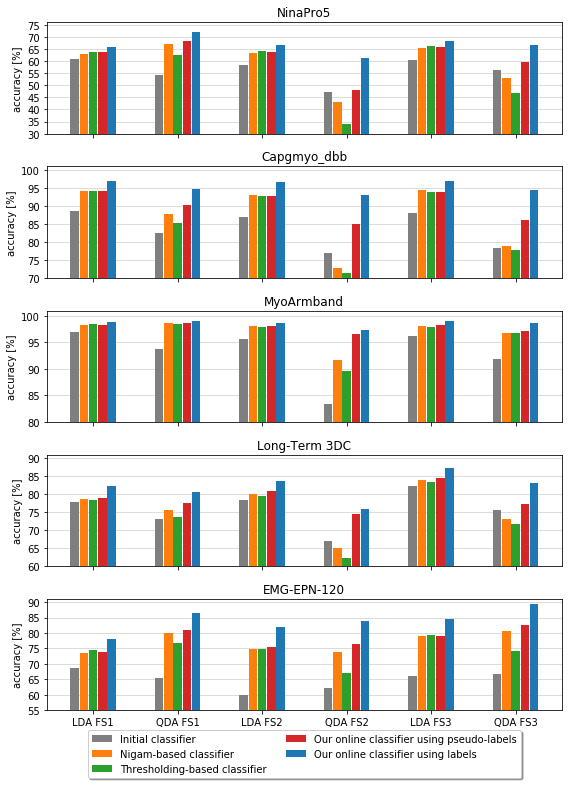

In [3]:
analysis_experiments.experiment1(graph_acc=True)

We also perform the analysis of time of the batch classifier using labels and our online classifier using labels and pseudo-labels.

In [4]:
analysis_experiments.experiment1(analysis_time=True)



FEATURE 1: Nina5
time[s]: LDA_batch 439.06 ± 27.07
time[s]: LDA_ours_soft_labels 0.99 ± 0.15
time[s]: LDA_ours_labels 0.69 ± 0.04
time[s]: QDA_batch 437.53 ± 27.07
time[s]: QDA_ours_soft_labels 0.42 ± 0.19
time[s]: QDA_ours_labels 0.08 ± 0.0

FEATURE 2: Nina5
time[s]: LDA_batch 524.69 ± 40.06
time[s]: LDA_ours_soft_labels 1.25 ± 0.19
time[s]: LDA_ours_labels 0.9 ± 0.04
time[s]: QDA_batch 523.07 ± 40.04
time[s]: QDA_ours_soft_labels 0.46 ± 0.17
time[s]: QDA_ours_labels 0.09 ± 0.01

FEATURE 3: Nina5
time[s]: LDA_batch 523.24 ± 43.38
time[s]: LDA_ours_soft_labels 1.23 ± 0.22
time[s]: LDA_ours_labels 0.89 ± 0.05
time[s]: QDA_batch 521.6 ± 43.33
time[s]: QDA_ours_soft_labels 0.44 ± 0.19
time[s]: QDA_ours_labels 0.1 ± 0.01

FEATURE 1: Capgmyo_dbb
time[s]: LDA_batch 77.21 ± 3.39
time[s]: LDA_ours_soft_labels 0.79 ± 0.07
time[s]: LDA_ours_labels 0.68 ± 0.06
time[s]: QDA_batch 75.8 ± 3.35
time[s]: QDA_ours_soft_labels 0.19 ± 0.07
time[s]: QDA_ours_labels 0.08 ± 0.01

FEATURE 2: Capgmyo_dbb
tim

## Experiment 2

In this experiment, we show the robustness to mislabeled data of our online classifier due to how we calculate the
 covariance matrix (COV). Traditionally, the COV of the DA classifiers is calculated w.r.t. the mean vector of all
 gestures, whereas we calculate w.r.t. the mean vectors of each gesture.

Concretely, we compare the performance of the weighted batch classifier and a version of this weighted classifier
(from now on called traditional classifier), in which the covariance matrix (COV) is calculated w.r.t.
the mean vector of all gestures.
Note that our online classifier using pseudo-labeled gestures has the same performance as the weighted batch classifier,
 as shown Theorem 2.

We show the accuracy difference of these two compared batch classifiers w.r.t. the initial classifier using labeled
and pseudo-labeled gestures as shown in the next figure.
When the accuracy of any of these classifiers is higher than the initial classifier, the accuracy difference
is positive; otherwise, it is negative.
We use the 2-tailed Wilcoxon signed ranks test at $p_{value}<0.5$ to determine if the accuracy differences are
statistically significant.
When these two batch classifiers use labeled gestures, their performance is similar for LDA and QDA. In contrast,
when they use pseudo-labeled gestures, the performance of the weighted batch classifier is significantly higher
than the difference of the traditional classifier.
In fact, the performance of the traditional classifier is worse than the performance of the initial classifier in several cases.


ANALYSIS WILCOXON (CONFIDENCE LEVEL 95%) shows the accuracy of two classifiers that come from the same distribution (Nina5): 

FEATURE 1: Nina5
p value:  0.2958775226696384 , LDA: weighted and traditional batch classifiers using pseudo-labels come from the same distribution
p value=  0.654158944417145 , LDA: weighted and traditional batch classifiers using labels come from the same distribution

FEATURE 2: Nina5
p value=  0.8227604017844778 , QDA: weighted and traditional batch classifiers using labels come from the same distribution

FEATURE 3: Nina5
p value=  0.5015913016269502 , QDA: weighted and traditional batch classifiers using labels come from the same distribution

ANALYSIS WILCOXON (CONFIDENCE LEVEL 95%) shows the accuracy of two classifiers that come from the same distribution (Capgmyo_dbb): 

FEATURE 1: Capgmyo_dbb
p value=  0.5186995762757332 , QDA: weighted and traditional batch classifiers using labels come from the same distribution

FEATURE 2: Capgmyo_dbb
p value=  0.

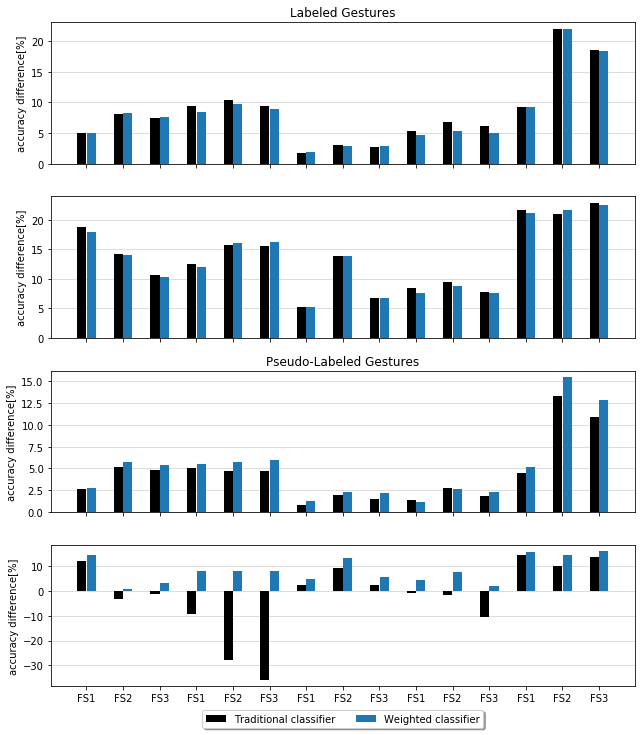

In [5]:
analysis_experiments.experiment2()

## Friedman rank test

We also perform the Friedman test's average ranks of the three pseudo-labeleing techniques (Nigam's technique, thresholding
and our soft-labelling technique) and of the two batch classifiers (weighted and traditional classifiers).

In [6]:
analysis_experiments.experiment1(friedman=True)




FRIEDMAN TOTAL (CONFIDENCE LEVEL 95%) soft-labelling techniques

Type DA classifier: LDA
ours_soft_labelling: 2.0
Nigam's technique: 2.1
thresholding: 1.9

 The best classifier is:  thresholding
                                            p    sig
thresholding vs Nigam's technique    0.000008   True
thresholding vs ours_soft_labelling  0.055365  False

Type DA classifier: QDA
ours_soft_labelling: 1.7
Nigam's technique: 2.1
thresholding: 2.2

 The best classifier is:  ours_soft_labelling
                                            p   sig
ours_soft_labelling vs Nigam's technique  0.0  True
ours_soft_labelling vs thresholding       0.0  True


FRIEDMAN TOTAL (CONFIDENCE LEVEL 95%) batch classifiers

Type DA classifier: LDA
labels
weighted classifier: 1.5
traditional classifier: 1.5

 The best classifier is:  traditional classifier
                                                      p    sig
traditional classifier vs weighted classifier  0.061532  False

Type DA classifier: QDA
labels